# _------- SCC-ICMC-USP - 2025/2 -------_

# **SME0142** - Álgebra Linear e Aplicações

# TRABALHO FINAL DA DISCIPLINA - Fast Fourier Transform


## **Docente**:

- Profª Dra. Cynthia de Oliveira Lage Ferreira


## Discentes

- Integrante 1: Dante Brito Lourenço - 15447326

- Integrante 2: João Gabriel Pieroli da Silva - 15678578


## Raízes complexas

Seja um polinômio de rank n-1:

$A(x) = a_0 x^0 + a_1 x^1 + ... + a_{n-1} x^{n-1}$

É possível provar que a equação $x^n = 1$ possui $n$ raízes complexas (chamadas de n-ésimas raízes da unidade), e que suas soluções são da forma:

$w_{n,k} = e^{\frac{2 k \pi i}{n}}$ com $k = 0, 1,..., n+1$

Adicionalmente, esses numeros complexos tem propriedades interessantes. Por exemplo, a n-ésima raíz principal $w_n = w_{n,1}= e^{\frac{2 \pi i}{n}}$ pode ser usada para descrever todas as outras n-ésimas raízes: $w_{n, k} = (w_n)^k$

Pode-se ler mais sobre raiz da unidade aqui: https://pt.wikipedia.org/wiki/Raiz_da_unidade

## Discrete Fourier Transform (DFT)

A **transformada discreta de Fourier** do polinômio $A(x)$, representada pelos seus coeficientes 

$(a_0, a_1, ..., a_{n-1})$ é definida como os valores do polinômio nos pontos $x = w_{n, k}$. Ou seja:

$DFT(a_0, a_1,...,a_{n-1}) = (y_0, y_1, ..., y_{n-1}) = (A(w_{n, 0}), A(w_{n, 1}), ..., A(w_{n, n-1}))$

E pela propriedade que abordamos acima, temos que:

$DFT(a_0, a_1,...,a_{n-1}) = (A({w_n}^0), A({w_n}^1), ..., A({w_n}^{n-1}))$

Similarmente, a **transformada discreta inversa de Fourier** é representada por:

$InverseDFT(y_0, y_1, ..., y_{n-1}) = (a_0, a_1,...,a_{n-1})$

### Aplicação: Multiplicação de polinômios

Veremos que se for possível realizar a DFT e DFT Inversa em $O(n \log n)$, teremos algo muito útil, pois sabemos que podemos multiplicar os polinômios em $O(N)$. Isso é muito mais rápido do que a convolução $O(n^2)$ tradicional.

A ideia central se baseia no **Teorema da Convolução**: a multiplicação de dois polinômios no domínio dos coeficientes é equivalente a uma multiplicação *elemento-a-elemento* (Hadamard) no domínio da frequência.

Sejam dois polinômios $A(x)$ e $B(x)$:

1.  **Transformar:** Calculamos a DFT de cada polinômio: $DFT(A)$ e $DFT(B)$.
2.  **Multiplicar:** Multiplicamos os dois vetores resultantes elemento por elemento:
    $V = DFT(A) ⋅ DFT(B)$
3.  **Inverter:** O resultado dessa multiplicação é a DFT do polinômio produto. Para obter o produto final $A \cdot B$, aplicamos a Transformada Inversa:
    $A ⋅ B = InverseDFT(V)$

> **Nota:** Para que isso funcione, os polinômios devem ser "preenchidos" com zeros (zero-padding) para terem o mesmo grau (e um tamanho $N$ adequado, geralmente uma potência de 2), garantindo que os vetores da DFT tenham o mesmo comprimento.

## A DFT e IDFT como Transformações Lineares (Complexidade $O(N^2)$)

A Transformada Discreta de Fourier (DFT) e sua inversa (IDFT) podem ser vistas como **transformações lineares**, representadas por multiplicações de matriz-vetor.

Seja $\mathbf{a}$ um vetor de $n$ amostras no domínio do tempo e $\mathbf{y}$ o vetor de $n$ coeficientes no domínio da frequência.

$$
\mathbf{a} = \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_{n-1} \end{bmatrix} \in \mathbb{C}^n
\quad \text{e} \quad
\mathbf{y} = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_{n-1} \end{bmatrix} \in \mathbb{C}^n
$$

---

### 1. A DFT (Transformada Direta)

A DFT é uma transformação linear que mapeia $\mathbf{a}$ para $\mathbf{y}$ através de uma matriz $n \times n$, que chamamos de **Matriz DFT** (uma Matriz de Vandermonde, veja mais aqui https://pt.wikipedia.org/wiki/Matriz_de_Vandermonde), $\mathbf{F}_n$.

$$
\mathbf{y} = \mathbf{F}_n \mathbf{a}
$$

Usando a $n$-ésima raiz primitiva da unidade, $w_n = e^{-i 2\pi / n}$, a matriz $\mathbf{F}_n$ é definida com o elemento $[k, j]$ (linha $k$, coluna $j$) sendo:

$$
\mathbf{F}_n [k, j] = w_n^{kj}
$$

Expandindo a multiplicação $\mathbf{y} = \mathbf{F}_n \mathbf{a}$, obtemos:

$$
\begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_{n-1} \end{bmatrix}
=
\begin{bmatrix}
    w_n^0 & w_n^0 & w_n^0 & \dots & w_n^0 \\
    w_n^0 & w_n^1 & w_n^2 & \dots & w_n^{n-1} \\
    w_n^0 & w_n^2 & w_n^4 & \dots & w_n^{2(n-1)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    w_n^0 & w_n^{n-1} & w_n^{2(n-1)} & \dots & w_n^{(n-1)(n-1)}
\end{bmatrix}
\begin{bmatrix} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_{n-1} \end{bmatrix}
$$

Assim, obtemos a fórmula:

$$
y_k = \sum_{j=0}^{n-1} a_j w_n^{kj},
$$

**Complexidade $O(n^2)$:** O cálculo de cada coeficiente $y_k$ é o **produto interno** da $k$-ésima linha de $\mathbf{F}_n$ com o vetor $\mathbf{a}$, o que custa $O(n)$. Como há $n$ coeficientes, a complexidade total é $O(n^2)$.

---

### 2. A IDFT (Transformada Inversa)

A IDFT é a **transformação linear inversa**, mapeando $\mathbf{y}$ de volta para $\mathbf{a}$:

$$
\mathbf{a} = \mathbf{F}_n^{-1} \mathbf{y}
$$

A matriz inversa $\mathbf{F}_n^{-1}$ tem o elemento $[j, k]$ (linha $j$, coluna $k$) dado por:

$$
\mathbf{F}_n^{-1} [j, k] = \frac{1}{n} w_n^{-jk} = \frac{1}{n} e^{i 2\pi jk / n}
$$

Expandindo a multiplicação $\mathbf{a} = \mathbf{F}_n^{-1} \mathbf{y}$:

$$
\begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_{n-1} \end{bmatrix}
=
\frac{1}{n}
\begin{bmatrix}
    w_n^0 & w_n^0 & w_n^0 & \dots & w_n^0 \\
    w_n^0 & w_n^{-1} & w_n^{-2} & \dots & w_n^{-(n-1)} \\
    w_n^0 & w_n^{-2} & w_n^{-4} & \dots & w_n^{-2(n-1)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    w_n^0 & w_n^{-(n-1)} & w_n^{-2(n-1)} & \dots & w_n^{-(n-1)(n-1)}
\end{bmatrix}
\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_{n-1} \end{bmatrix}
$$

Portanto:

$$
a_k = \frac{1}{n} \sum_{j=0}^{n-1} y_j w_n^{-kj}
$$

A complexidade também é $O(n^2)$, pois é outra multiplicação matriz-vetor $n \times n$.

---

### 3. A Relação de Ortogonalidade

A inversão funciona devido à **ortogonalidade** das colunas (e linhas) da matriz DFT.

A matriz $\mathbf{F}_n^{-1}$ (sem o fator $\frac{1}{n}$) é a **conjugada transposta** (Hermitiana) da matriz $\mathbf{F}_n$, denotada $\mathbf{F}_n^*$.

* $\mathbf{F}_n^{-1} = \frac{1}{n} \mathbf{F}_n^*$

A propriedade fundamental é que:

$$
\mathbf{F}_n \mathbf{F}_n^* = n \mathbf{I}
$$

Onde $\mathbf{I}$ é a matriz identidade $n \times n$. Isso prova a inversão:
$\mathbf{a} = \mathbf{F}_n^{-1} \mathbf{y} = (\frac{1}{n} \mathbf{F}_n^*) (\mathbf{F}_n \mathbf{a}) = (\frac{1}{n} n \mathbf{I}) \mathbf{a} = \mathbf{a}$

> **Conceito-Chave:** A DFT é uma *mudança de base* para uma base ortogonal de sinusoides complexas. A matriz $\frac{1}{\sqrt{n}}\mathbf{F}_n$ é uma **matriz unitária**, que preserva a norma (energia) do vetor (Teorema de Parseval).

In [18]:
import numpy as np

def dft(a):
    """
    Calcula a Transformada Discreta de Fourier O(N^2)
    usando a multiplicação da matriz de Vandermonde.
    
    Retorna y, sendo: y = F_n * a
    """
    # Converte o input para um array numpy de números complexos
    a = np.asarray(a, dtype=complex)
    n = a.shape[0]
    
    # Calcula a n-ésima raiz primitiva da unidade
    w_n = np.exp(-2j * np.pi / n)
    
    # Vamos criar uma matriz de expoentes para aplicar em w_n
    # k = linhas (0 a n-1), j = colunas (0 a n-1)
    k = np.arange(n)
    j = np.arange(n)
    kj_matrix = np.outer(k, j) # Matriz onde [k, j] = k * j
    
    # Cria a Matriz DFT (F_n)
    # F_n[k, j] = w_n^(k*j)
    F_n_matrix = np.power(w_n, kj_matrix)
    
    # Calcula a transformação (multiplicação matriz-vetor)
    y = F_n_matrix @ a
    
    return y

def idft(y):
    """
    Calcula a Transformada Discreta de Fourier Inversa (IDFT) O(N^2)
    
    Notação: a = F_n_inv * y
    """
    # Converte o input para um array numpy de números complexos
    y = np.asarray(y, dtype=complex)
    n = y.shape[0]
    
    # calcula a "raiz inversa" w_n^(-1)
    # w_n^(-1) = e^(+2j * pi / n)
    w_n_inv = np.exp(2j * np.pi / n)
    
    # Cria a matriz de expoentes
    # j = linhas (0 a n-1), k = colunas (0 a n-1)
    j = np.arange(n)
    k = np.arange(n)
    jk_matrix = np.outer(j, k) # Matriz onde [j, k] = j * k
    
    # Matriz IDFT (F_n_inv)
    # F_n_inv[j, k] = (1/n) * w_n^(-j*k)
    F_n_inv_matrix = (1 / n) * np.power(w_n_inv, jk_matrix)
    
    # Calcula a transformação (multiplicação matriz-vetor)
    a = F_n_inv_matrix @ y
    
    return a

np.set_printoptions(precision=2, suppress=True)

# Sinal de entrada
a = np.array([2, 0, 3, 0, 0, 0], dtype=float)
b = np.array([1, 0, -1, 2, 0, 0], dtype=float)

def circConv(a, b):
    print("Calculando Convolução Circular O(N^2)")
    n = len(a)
    c_circular = np.zeros(n, dtype=complex)

    for k in range(n):
        soma = 0 + 0j
        for m in range(n):
            indice_b = (k - m) % n
            soma += a[m] * b[indice_b]
        c_circular[k] = soma

    print(f"Resultado (Convolução Circular):\n{c_circular}\n")
    return c_circular

c_circular = circConv(a, b)

print("Calculando com DFT")
a_dft = dft(a)
b_dft = dft(b)

c_dft = a_dft * b_dft

c_dft_method = idft(c_dft)
print(f"Resultado (DFT):\n{c_dft_method}")


are_equal = np.allclose(c_circular, c_dft_method)

print(f"Os dois métodos são iguais? {are_equal}\n")

if are_equal:
    print("Sucesso! O Teorema da Convolução foi verificado.")
    print("Convolução Circular (Tempo) == Multiplicação (Frequência)")
else:
    print("Falha! Os resultados não são iguais.")



Calculando Convolução Circular O(N^2)
Resultado (Convolução Circular):
[ 2.+0.j  0.+0.j  1.+0.j  4.+0.j -3.+0.j  6.+0.j]

Calculando com DFT
Resultado (DFT):
[ 2.-0.j -0.-0.j  1.-0.j  4.-0.j -3.+0.j  6.+0.j]
Os dois métodos são iguais? True

Sucesso! O Teorema da Convolução foi verificado.
Convolução Circular (Tempo) == Multiplicação (Frequência)


### Fast Fourier Transform - (Nlog(N))

A ideia principal é aplicar divide and conquer para manipular o vetor de coeficientes, e obter o resultado mais rapidamente.

Seja um polinômio A(x) com grau n-1 , onde n é uma potência de 2, e $n > 1$:

$A(x) = a_0 x^0 + a_1 x^1 + ... + a_{n-1} x^{n-1}$

Podemos dividí-lo em dois polinômios menores, um contendo os coeficientes em posições pares e outro contendo os coeficientes em posições ímpares:

$A_0(x) = a_0 x^0 + a_2 x^1 + ... + a_{n-2} x^{\frac{n}{2}-1}$

$A_1(x) = a_1 x^0 + a_3 x^1 + ... + a_{n-1} x^{\frac{n}{2}-1}$

Observe que

$A(x) = A_0(x^2) + xA_1(x^2)$

Agora suponha que tenhamos computado os vetores 
$(y_k^0)_{k=0}^{n/2-1} = DFT(A_0)$ e 
$(y_k^1)_{k=0}^{n/2-1} = DFT(A_1)$ 

Encontraremos uma expressão para $(y_k)_{k=0}^{n-1} = DFT(A)$ 

Para os primeiros $\frac{n}{2}$ valores podemos simplesmente usar equação definida anteriormente: 

$A(x) = A_0(x^2) + xA_1(x^2)$

O que nos dá:

$y_k = A(w_n^k) = y_k^0 + w_n^k y_k^1, \quad k = 0 \dots \dfrac{n}{2}-1$

Para a segunda metade a expressão é um pouco diferente:

$$
\begin{align*}
y_{k+n/2} &= A\left(w_n^{k+n/2}\right) \\
&= A_0\left(w_n^{2k+n}\right) + w_n^{k+n/2} A_1\left(w_n^{2k+n}\right) \\
&= A_0\left(w_n^{2k} w_n^n\right) + w_n^k w_n^{n/2} A_1\left(w_n^{2k} w_n^n\right) \\
&= A_0\left(w_n^{2k}\right) - w_n^k A_1\left(w_n^{2k}\right) \\
&= y_k^0 - w_n^k y_k^1
\end{align*}
$$

Aqui usamos novamente $A(x) = A_0(x^2) + xA_1(x^2)$ e as duas identidades $w_n^n = 1$ e $w_n^{n/2} = -1$.

Portanto, obtemos as fórmulas desejadas para calcular o vetor completo $(y_k)$:

$$
\begin{align*}
y_k &= y_k^0 + w_n^k y_k^1, \quad k = 0 \dots \frac{n}{2}-1, \\
y_{k+n/2} &= y_k^0 - w_n^k y_k^1, \quad k = 0 \dots \frac{n}{2}-1.
\end{align*}
$$

Esse padrão $a+b$ e $a-b$ é às vezes chamado de borboleta.

Veja que isso nos permite calcular $DFT(A)$ em tempo linear usando $DFT(A_0)$ e $DFT(A_1)$. Isso é o que nos permite realizar o divide and conquer e obter o algoritmo em $O(Nlog(N))$.


### FFT Inversa

Vamos relembrar como definimos os termos da $DFT$ e da $InverseDFT$:

$y_k = \sum_{j=0}^{n-1} a_j w_n^{kj}, \quad$
$a_k = \frac{1}{n} \sum_{j=0}^{n-1} y_j w_n^{-kj}$

Perceba que essas 2 equações são muito similares.  Isso nos permite encontrar os coeficientes $a_k$ com o mesmo algoritmo de divide and conquer, como o FFT direto. A única diferença é que ao invés de $w_n^k$ nós utilizaremos $w_n^{-k}$, e no final teremos que dividir os coeficientes por $n$.

## Implementação

Aqui mostraremos uma implementação simples de FFT e FFT inversa, juntas em uma função, já que a diferença entre as suas implementações é tão pequena.

In [4]:
import cmath

def fft(a: list[complex], invert:bool = False):
    """Calcula a FFT recursiva, e modifica a lista 'a' in-place"""
    n = len(a)

    if n == 1: 
        return
    
    # Divide o array e em dois e calcula o fft para eles
    a0 = a[0::2].copy() #elementos pares
    a1 = a[1::2].copy() #elementos ímpares

    fft(a0, invert)
    fft(a1, invert)


    ang = 2.0 * cmath.pi / (n * (1.0 if invert else -1.0))

    w = 1 +0j
    wn = cmath.cos(ang) + 1j * cmath.sin(ang)
    for i in range(n // 2):
        # aplicamos o padrão borboleta no nosso intervalo atual
        a[i] = a0[i] + w * a1[i]
        a[i + n//2] = a0[i] - w*a1[i]

        # É provado que ao dividir o resultado por 2 em cada nível da recursão,
        # isso resultará em dividir os valores finais por n
        if invert:
            a[i] /= 2
            a[i + n//2] /= 2

        w *= wn


E agora, será que deu certo? Vamos realizar o teste da multiplicação novamente.

In [5]:
np.set_printoptions(precision=2, suppress=True)

# Sinal de entrada
a = np.array([2, 0, 3, 0, 1, 2], dtype=float)
b = np.array([1, 0, -7, 2, 0, 4], dtype=float)


# Lembrando que o tamanho da lista deve ser uma potência de 2 para o FFT funcionar
def nextPow2(n):
    return 1 if n==0 else 2**(n-1).bit_length()


# Ajeita os arrays para calcular o FFT
n_min = len(a) + len(b) - 1
n_corrij = nextPow2(n_min)

a_certo = np.zeros(n_corrij, dtype=complex)
b_certo = np.zeros(n_corrij, dtype=complex)

a_certo[:len(a)] = a
b_certo[:len(b)] = b

c_circular = circConv(a_certo, b_certo)

print("Calculando com FFT")
fft(a_certo, invert = False)
fft(b_certo, invert = False)

c_ft = a_certo * b_certo

fft(c_ft, invert= True)
print(f"Resultado (FFT):\n{c_ft}")


are_equal = np.allclose(c_circular, c_ft[:len(c_circular)])

print(f"Os dois métodos são iguais? {are_equal}\n")

if are_equal:
    print("A FFT está funcionando!")
else:
    print("Algo deu errado")

Calculando Convolução Circular O(N^2)
Resultado (Convolução Circular):
[  2.+0.j   0.+0.j -11.+0.j   4.+0.j -20.+0.j  16.+0.j  -7.+0.j   0.+0.j
   4.+0.j   4.+0.j   8.+0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.j]

Calculando com FFT
Resultado (FFT):
[  2.+0.j   0.-0.j -11.+0.j   4.-0.j -20.-0.j  16.-0.j  -7.+0.j  -0.+0.j
   4.+0.j   4.+0.j   8.-0.j   0.+0.j  -0.+0.j   0.-0.j  -0.+0.j  -0.-0.j]
Os dois métodos são iguais? True

A FFT está funcionando!


# Blur via FFT

A aplicação de **blur** usando Transformada Rápida de Fourier (FFT) explora uma propriedade fundamental da convolução:

$$
f(x,y) * h(x,y) \quad \Longleftrightarrow \quad F(u,v) \cdot H(u,v)
$$

Ou seja, convoluir uma imagem com um kernel no domínio espacial é equivalente a multiplicar suas FFTs no domínio da frequência.

---

## 1. Conversão da Imagem para Matrizes

A imagem colorida é separada em três canais independentes:

- $R(x,y)$ – canal vermelho  
- $G(x,y)$ – canal verde  
- $B(x,y)$ – canal azul  

Cada canal é tratado como uma matriz 2D onde cada posição representa um pixel.

---

## 2. Kernel de Blur (Média)

O kernel usado é o de média (box blur):

$$
k(i,j) = \frac{1}{n^2}
\quad\text{para}\quad
n = \text{kernel\_size}
$$

Este kernel suaviza a imagem, uma vez que cada pixel filtrado é a média dos vizinhos.

---

## 3. Preparação para a Convolução via FFT

Para evitar problemas de aliasing, as matrizes são expandidas para o próximo tamanho potência de 2:

- A imagem é copiada para uma matriz maior $$I_p$$  
- O kernel é colocado em uma matriz maior $$K_p$$  

Essas matrizes têm dimensões:

$$
N = 2^{\lceil \log_2(r + k - 1) \rceil}
$$

Onde:

- $r, c$ = dimensões da imagem  
- $k$ = tamanho do kernel  

---

## 4. FFT 2D Manual

A FFT 2D é calculada:

1. Aplicando FFT em cada linha da matriz  
2. Aplicando FFT em cada coluna da matriz 

Matematicamente,

$$
F(u,v) = \text{FFT2}(I_p)  
$$

$$
H(u,v) = \text{FFT2}(K_p)
$$

---

## 5. Convolução no Domínio da Frequência

A convolução espacial entre imagem e kernel é substituída pela multiplicação ponto a ponto:

$$
G(u,v) = F(u,v) \cdot H(u,v)
$$

Nesta etapa:

- Frequências altas são atenuadas, pois o kernel é suave
- Frequências baixas são preservadas  

Esse comportamento é o que produz o efeito de blur.

---

## 6. Transformada Inversa

Após a multiplicação, aplica-se a **IFFT** (FFT inversa):

$$
g(x,y) = \text{IFFT2}(G(u,v))
$$

O resultado é recortado de volta ao tamanho original e convertido para uint8.

---

## Conclusão

Frente ao supracitado, a FFT transforma a convolução — uma operação cara — em uma simples multiplicação, permitindo filtros grandes (como kernels gigantes) serem aplicados de forma extremamente eficiente.

O processo todo equivale a:

$$
\text{Blur}(I) = \text{IFFT2}\big( \text{FFT2}(I) \cdot \text{FFT2}(k) \big)
$$

E isso é aplicado para **R**, **G**, e **B**, reconstruindo a imagem final borrada.






In [20]:
import numpy as np
from PIL import Image
import time

class FftBlur:
    # Expande o FFT para duas dimensões, trabalhando com linhas e colunas
    def fft_2d(self, mat, invert=False):
        rows, cols = mat.shape
        result = mat.astype(complex).copy()
        for i in range(rows):           
            row = result[i, :].copy()
            fft(row, invert)
            result[i, :] = row

        for j in range(cols):
            col = result[:, j].copy()
            fft(col, invert)
            result[:, j] = col

        return result

    # Aplica o blur de FFT para um determinado canal de cor (R,G,B)
    def _apply_fft_blur_channel(self, channel, kernel_size):
        kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
        r, c = channel.shape
        kr, kc = kernel.shape

        # É necessário trabalhar com a próxima potência de 2 para as dimensões
        size_r = nextPow2(r + kr - 1)
        size_c = nextPow2(c + kc - 1)
        
        padded_img = np.zeros((size_r, size_c), dtype=complex)
        padded_kernel = np.zeros((size_r, size_c), dtype=complex)

        padded_img[:r, :c] = channel
        padded_kernel[:kr, :kc] = kernel

        # Aplica o FFT na imagem e no kernel
        F_img = self.fft_2d(padded_img)
        F_kernel = self.fft_2d(padded_kernel)

        # Multiplica e calcula o inverso do FFT
        F_result = F_img * F_kernel
        result = np.real(self.fft_2d(F_result, invert=True))
        result = result[:r, :c]

        return np.clip(result, 0, 255)

    def fft_blur(self, image_path, output_path, kernel_size=5):
        img = Image.open(image_path).convert("RGB")
        img_array = np.array(img, dtype=float)

        # Chama a função para cada canal de cor 
        R = self._apply_fft_blur_channel(img_array[:, :, 0], kernel_size)
        G = self._apply_fft_blur_channel(img_array[:, :, 1], kernel_size)
        B = self._apply_fft_blur_channel(img_array[:, :, 2], kernel_size)

        # Junta os canais de cor com o efeito aplicado
        result = np.dstack([R, G, B]).astype(np.uint8)
        Image.fromarray(result).save(output_path)
        return result


Imagem original:


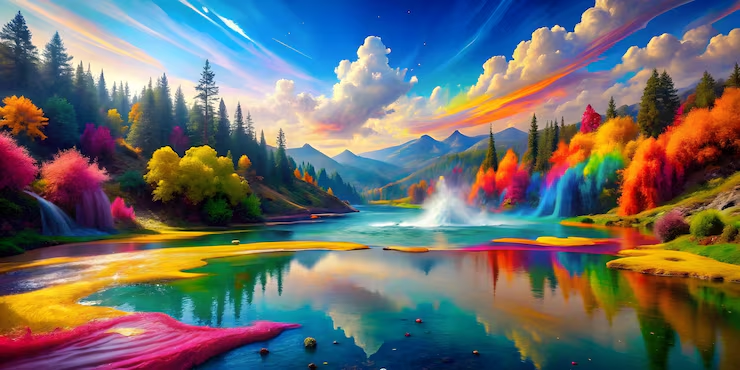

Imagem com blur via FFT:


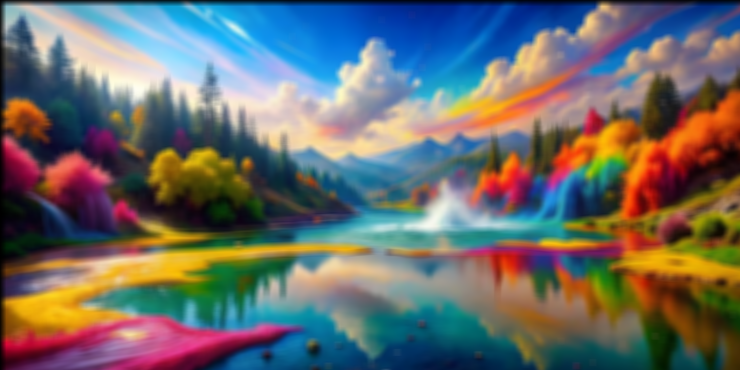

In [21]:
IMG_SOURCE = "./img/RGB.png" # use None caso queira colocar o seu próprio input
IMG_TARGET = "./img/blur_RGB.png" # use None caso queira colocar o seu próprio input

import time

if IMG_SOURCE is None:
  IMG_SOURCE = input().strip()

if IMG_TARGET is None:
  IMG_TARGET = input().strip()

fftblur = FftBlur()
blurred = fftblur.fft_blur(IMG_SOURCE, IMG_TARGET, kernel_size=7)

print("Imagem original:")
display(Image.open(IMG_SOURCE))

print("Imagem com blur via FFT:")
display(Image.open(IMG_TARGET))
